<a href="https://colab.research.google.com/github/Faizanealiqazi/TSP_CUCKOO_SEARCH/blob/main/NIIA_PROJECT_EFFECTS_OF_POPULATION_ON_CUCKOO_SEARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.cm import get_cmap

In [87]:
#Initialize population with random tours
#Evaluate the fitness of each tour
#
#for each generation do
#    Generate a new tour by Lévy flight from an existing tour
#    Evaluate its fitness
#    Choose a random nest (tour) from the population
#    if the fitness of the new tour is better than the chosen nest then
#        Replace the chosen nest with the new tour
#    end if
#    Abandon a fraction pa of the worst nests and generate new ones
#    Keep the best tour found so far
#end for
#
#Return the best tour

In [88]:
# Function to plot the initial configuration of the TSP
def plot_initial_tsp_graph(cities):
    plt.figure(figsize=(10, 6))
    plt.scatter(cities[:, 0], cities[:, 1], color='red')
    plt.title('Initial Traveling Salesman Problem Graph')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

# Function to generate a random path
def random_path(num_cities):
    return np.random.permutation(num_cities)

# Function to calculate total distance of a path
def total_distance(cities, path):
    return sum(np.linalg.norm(cities[path[i]] - cities[path[(i + 1) % len(path)]]) for i in range(len(path)))

# Levy flight function for TSP
def levy_flight(beta, size=1):
    # Calculation of sigma (standard deviation)
    sigma_u = (math.gamma(1 + beta) * math.sin(math.pi * beta / 2) /
               (math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)
    sigma_v = 1

    u = np.random.normal(0, sigma_u, size)
    v = np.random.normal(0, sigma_v, size)
    step = u / np.fabs(v) ** (1 / beta)

    return step

# Cuckoo Search for TSP with simple Lévy flights
def cuckoo_search_tsp(cities, n, max_iter, pa, beta=1.5):
    num_cities = len(cities)  # The total number of cities
    nests = [random_path(num_cities) for _ in range(n)]  # Initialize nests with random tours
    fitness = np.array([total_distance(cities, nest) for nest in nests])  # Fitness of each nest

    # Find the best solution in the initial population
    best_nest_idx = fitness.argmin()
    best_nest = nests[best_nest_idx]
    best_fitness = fitness[best_nest_idx]

    # Main loop of the Cuckoo Search
    for t in range(max_iter):
        for i in range(n):
            new_nest = np.copy(nests[i])

            # Get a step size from Lévy flight
            step_size = levy_flight(beta)
            # Apply the step to a randomly chosen subset of the tour
            city_indices = np.sort(np.random.choice(num_cities, 2, replace=False))
            start, end = city_indices
            if (start + step_size) % num_cities < end:
                new_nest[start:end] = np.roll(new_nest[start:end], int(step_size))
            else:
                new_nest[end:(start + int(step_size)) % num_cities] = np.roll(new_nest[end:(start + int(step_size)) % num_cities], int(step_size))

            # Calculate the fitness of the new solution
            fnew = total_distance(cities, new_nest)

            # Greedily select the better solution
            if fnew < fitness[i]:
                nests[i] = new_nest
                fitness[i] = fnew

                # Update the best solution found so far
                if fnew < best_fitness:
                    best_nest = new_nest
                    best_fitness = fnew

        # Abandon a fraction (pa) of the worst nests
        for i in range(n):
            if np.random.rand() < pa:
                nests[i] = random_path(num_cities)  # Generate a new random solution for a nest
                fitness[i] = total_distance(cities, nests[i])  # Recalculate its fitness

    return best_nest, best_fitness


# Function to run the Cuckoo Search algorithm for different population sizes
def run_cuckoo_search(cities, population_sizes, max_iter, pa):
    best_distances = []
    best_paths = []
    for n in population_sizes:
        best_path, best_fitness = cuckoo_search_tsp(cities, n, max_iter, pa)
        best_distances.append(best_fitness)
        best_paths.append(best_path)
        print(f"Population size: {n}, Best Distance: {best_fitness}")
    return best_distances, best_paths

# Function to find the best population size
def test_population_sizes(cities, population_sizes, max_iter, pa, best_distances):
    best_index = np.argmin(best_distances)
    best_population_size = population_sizes[best_index]
    best_distance = best_distances[best_index]
    return best_population_size, best_distance

# Function to plot the effect of population size on the Cuckoo Search performance
def test_population_sizes_plot(population_sizes, best_distances):
    plt.figure(figsize=(10, 6))
    plt.plot(population_sizes, best_distances, marker='o')
    plt.title('Effect of Population Size on Cuckoo Search for TSP')
    plt.xlabel('Population Size')
    plt.ylabel('Best Distance Found')
    plt.grid(True)
    plt.show()


def plot_best_paths(cities, best_paths, best_index=None, plot_best_flag_only=True):
    # Generate a color map
    num_paths = len(best_paths)
    cmap = get_cmap('viridis', num_paths)

    # Filter to only plot the best path if flag is set
    paths_to_plot = [best_paths[best_index]] if plot_best_flag_only and best_index is not None else best_paths

    for i, best_path in enumerate(paths_to_plot):
        plt.figure(figsize=(12, 8))
        plt.scatter(cities[:, 0], cities[:, 1], color='red', zorder=5)
        color = cmap(i)
        for j in range(len(best_path)):
            start_city = cities[best_path[j]]
            end_city = cities[best_path[(j + 1) % len(best_path)]]
            plt.plot([start_city[0], end_city[0]], [start_city[1], end_city[1]], color=color, zorder=1)
            # Annotate the city with the order number if not plotting the best path only
            plt.annotate(f'{j}', (start_city[0], start_city[1]), textcoords="offset points", xytext=(0,10), ha='center', zorder=10)

        plt.title('Best Path Found by Cuckoo Search' if plot_best_flag_only else 'Best Paths Found by Cuckoo Search for Different Population Sizes')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        plt.show()


In [89]:
num_cities = 100
max_iter = 1000
pa = 0.25
population_sizes = [20, 40, 80, 100]  # Different population sizes to test
cities = np.random.rand(num_cities, 2)

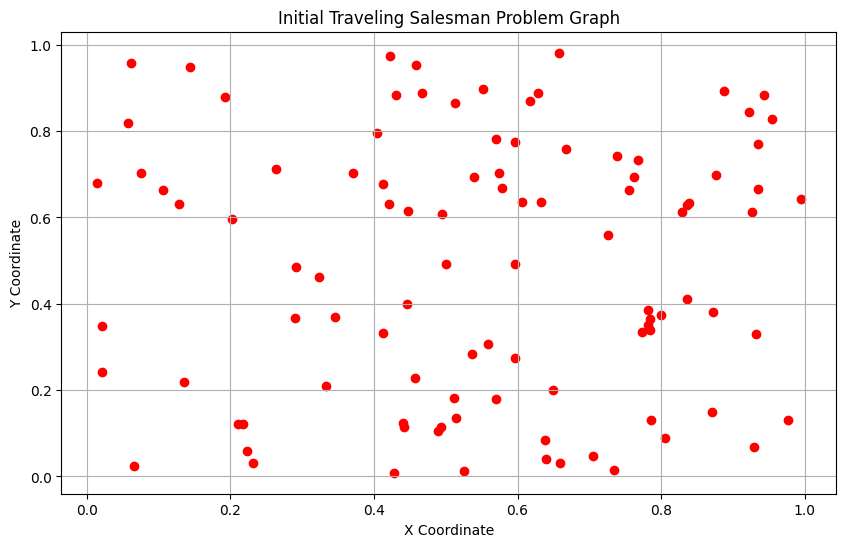

Population size: 20, Best Distance: 42.42886629901408
Population size: 40, Best Distance: 43.07013663721347
Population size: 80, Best Distance: 42.59302122929629
Population size: 100, Best Distance: 42.91684935246616
The best population size is 20 with a distance of 42.42886629901408.


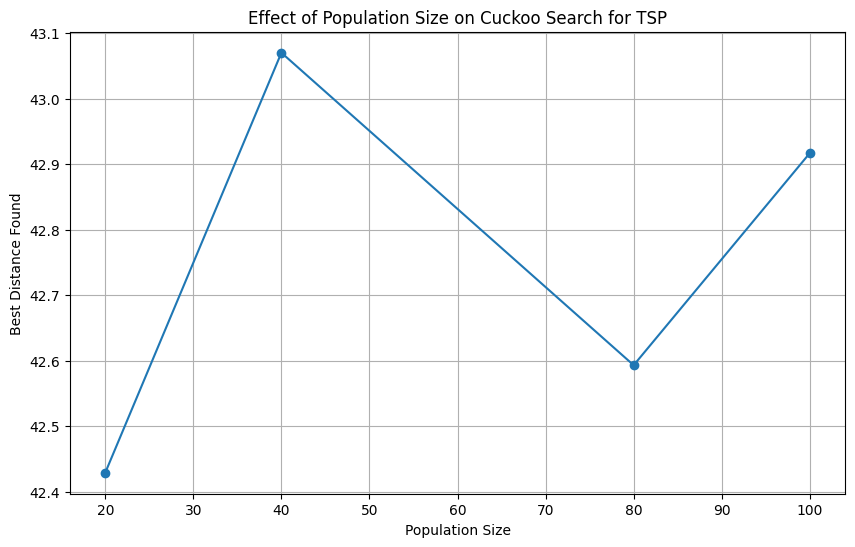

<ipython-input-88-5f6108459055>:112: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis', num_paths)


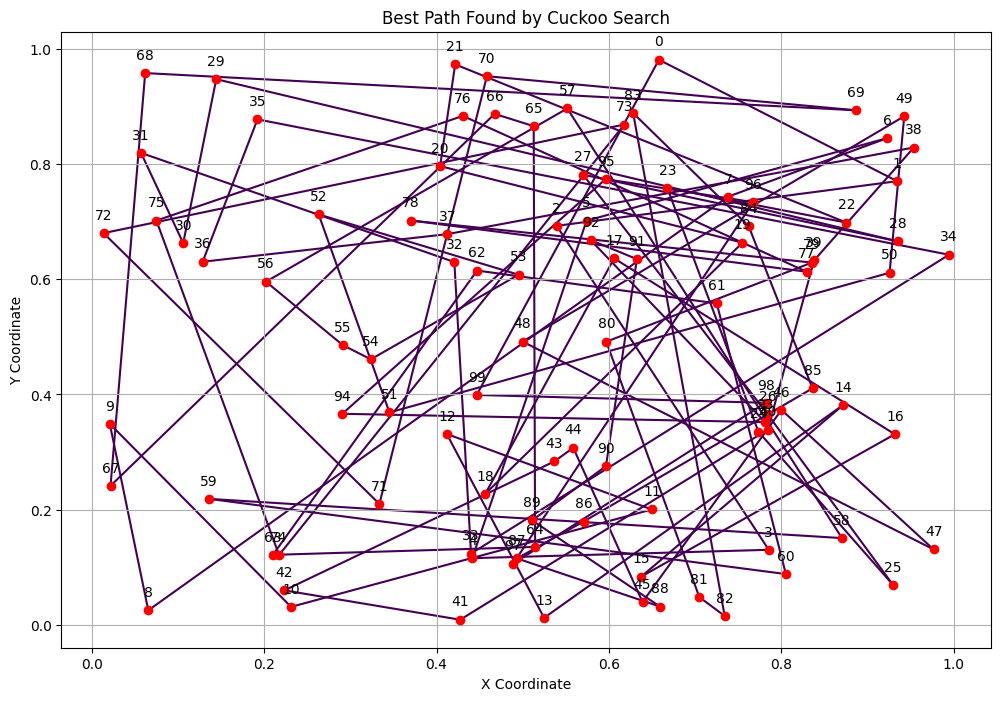

In [90]:
# Plot the initial TSP graph
plot_initial_tsp_graph(cities)

# Run the Cuckoo Search algorithm for different population sizes
best_distances, best_paths = run_cuckoo_search(cities, population_sizes, max_iter, pa)

# Find the best population size based on the best distances obtained
best_population_size, best_distance = test_population_sizes(cities, population_sizes, max_iter, pa, best_distances)
print(f"The best population size is {best_population_size} with a distance of {best_distance}.")

# Plot the effect of population size on the Cuckoo Search performance
test_population_sizes_plot(population_sizes, best_distances)

# Retrieve the best path for the best population size
best_index = population_sizes.index(best_population_size)
best_path = best_paths[best_index]

print("")

# Plot best paths for each population size
plot_best_paths(cities, best_paths, best_index)